# PyTorch Introduction to Deep Learning

# Coding Challenge 1:

We will implement a deep convolutional neural network (CNN) using PyTorch in this notebook coding challenge. The first exercise is to install the CPU version of PyTorch onto your system using the installation advice from the PyTorch.org link:

https://pytorch.org/

# Library Imports

If the Python interpreter advises that any of the library imports that are not recognised, you will have to install them to the Python envirnment for the notebook.
For any of the PyTorch packages that are not installed, you can navigate to Anaconda or the Pytorch website to find out how to install them. Most of the time, a PIP install through the notebook works to install PyTorch packages, but if the package is not recognised after a PIP installation and you are using Anaconda, search for how to install the package thought the Anaconda website.

In [94]:
%matplotlib inline
import torch
import torchvision
import torchmetrics
import torch.nn as nn
import torch.nn.functional as F
from torchvision.transforms import transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from torch.optim import Adam
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

# Checks the version of PyTorch and torchvision
print("PyTorch version: ",torch.__version__)
print("torchvision version: ", torchvision.__version__)

PyTorch version:  2.0.1
torchvision version:  0.15.2


# GPU/CPU Check

The device variable stores the binary conditional that checks if a GPU is available with your system. If a GPU is not available, the CPU is used. A CPU is all that is required for these coding challenges, provided you have more than 2GB of RAM memory on your system.

In [95]:
# Creates the deveice variable to tell PyTorch to use the CPU version of the library
device = torch.device('cpu')

# Uncomment this line of code if you have a GPU and would like to use a gpu
#Checking device of the system GPU/CPU
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prints out the device used to the screen
device

device(type='cpu')

# 1. Image Data Pre-Processing

# Load the MNIST Dataset of Handwritten Digets to the Jupyter Notebook
The MNIST dataset is a dataset that includes handwritten digits from 0 to 9 from the US postal service that belongs to Yan LeCun. The MNIST dataset is available at yanlecun.com for anyone to use:

http://yann.lecun.com/exdb/mnist/

As the MNIST dataset is available through PyTorch we will load the dataset directly to the Jupyter Notebook through Torch Datasets.

In [96]:
# Transforms the input data (images) to PyTorch tensors
transform = transforms.ToTensor()

# Downloads the train_data and test_data from Torch Datasets
train_data = datasets.MNIST(root='../Data',train=True,download=True,transform=transform)
test_data = datasets.MNIST(root='../Data',train=False,download=True,transform=transform)

# Coding Challenge 2

In the next code cell, check the length of the test dataset stored in the test_data variable in the code cell above in preparation for setting the number of images in the validation dataset.

In [ ]:
# Put your code here

# PyTorch image datasets are compatable with the inbuilt Python method len
# for checking the length or how many examples are in an image dataset
len(test_data)

# Coding Challenge 2 Continued

In the next code cell, set the number of validation images in the range function that is an argument of the SubsetRandomSampler object. The Validation dataset is stored in the valid_sampler variable in the following code cell.

An alternative to checking the length of the MNIST training dataset is to go to the dataset website, check the number of images in the test dataset, and enter the number of images described above.

MNIST dataset link:

http://yann.lecun.com/exdb/mnist/

In [97]:
# Splits the train and validation daatset
# Training dataset = 48000 images
train_sampler = SubsetRandomSampler(list(range(50000)))

# Validation dataset = 12000 images
valid_sampler = SubsetRandomSampler(list(range(10000)))

In [98]:
# Sets the batch size to load image batches to the network
batch_size = 20

# Creates the train data loader for the MNIST dataset images
train_dataset = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           sampler=train_sampler)

# Creates the validation data loader for the MNIST dataset images
valid_dataset  = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           sampler=valid_sampler)

# Creates the test data loader for the MNIST dataset images
test_dataset  = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

# Prints out the trianing and validaiton image quantites to the screen
print(f"There are {len(train_dataset) * batch_size} train images in the training dataset")
print(f"There are {len(train_dataset)} train images per training dataset batch\n")
print(f"There are {len(valid_dataset) * batch_size} validation images in the validation daatset")
print(f"There are {len(valid_dataset)} validation images per validation dataset batch\n")
print(f"There are {len(test_dataset) * batch_size} test images in the test dataset")
print(f"There are {len(test_dataset)} test images per test dataset batch\n")

There are 50000 train images in the training dataset
There are 2500 train images per training dataset batch

There are 10000 validation images in the validation daatset
There are 500 validation images per validation dataset batch

There are 10000 test images in the test dataset
There are 500 test images per test dataset batch



# Display a Batch of Training Images
In the next cells, a batch of images from the training dataset is loaded to the Jupyter/Colab Notebook. It is important to view the images when training image classification systems to get familiar with the datasets you are working with. Being familiar with the dataset can help you troubleshoot problems with more complex deep neural networks easier.

In [99]:
# Loads the first trianing batch to the notebook
for images, labels in train_dataset:
    break

Labels:  [2 0 5 1 9 3 4 0 8 4 4 4]


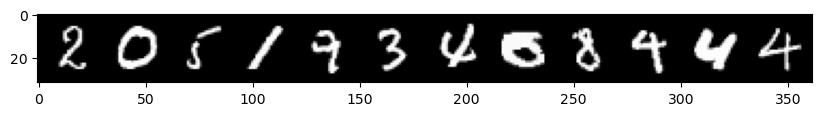

In [100]:
# Print the first 12 labels
print('Labels: ', labels[:12].numpy())

# Print the first 12 images
im = make_grid(images[:12], nrow=12)               # The default nrow is 8
plt.figure(figsize=(10,4))

# We need to transpose the images from CWH to WHC
plt.imshow(np.transpose(im.numpy(), (1,2,0)));

# Check the Training Batch Tensor and Labels

It is good practice to get to know the dimensions of the PyTorch tensors in the data loader. If a network dimensionality error is an output from the Python interpreter, you can check the dimension for the dataset loader to see if they align with your network architecture. As Pytorch tensors use matrix multiplication, if the dimensions are not aligned between the dataset and the input to the CNN, no data can be loaded to eh CNN by PyTorch. In this coding challenge, the dimensions of the CNN have been set up to align with the data in the Pytorch data loader for the notebook.

In [101]:
# Number of images, colour channel, width, height
images.shape

torch.Size([20, 1, 28, 28])

In [102]:
# Prints out the shape of the labels tensor to the screen
# The length of the labels should be the same as the batch size of 20
labels.shape

torch.Size([20])

# Display a Batch of Validation Images

In the next cells, a batch of images from the validation dataset is loaded to the Jupyter/Colab Notebook. It is important to view the images when training image classification systems to get familiar with the datasets you are working with. Being familiar with the dataset can help you troubleshoot problems with more complex deep neural networks easier.

In [103]:
# Loads the first validation batch to the notebook
for images, labels in valid_dataset:
    break

Labels:  [8 3 3 8 8 4 0 4 4 1 2 1]


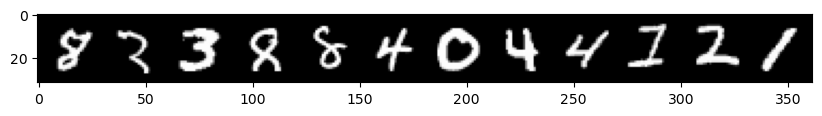

In [104]:
# Print the first 12 labels
print('Labels: ', labels[:12].numpy())

# Print the first 12 images
im = make_grid(images[:12], nrow=12)               # The default nrow is 8
plt.figure(figsize=(10,4))

# We need to transpose the images from CWH to WHC
plt.imshow(np.transpose(im.numpy(), (1,2,0)));

In [105]:
# Number of images, colour channel, width, height
images.shape

torch.Size([20, 1, 28, 28])

In [106]:
# Prints out the shape of the labels tensor to the screen
# The length of the labels should be the same as the batch size of 20
labels.shape

torch.Size([20])

# 3. PyTorch CNN Deep Neural Network

PyTorch Documentation:

https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

https://pytorch.org/docs/stable/generated/torch.nn.Linear.html?highlight=linear

https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html?highlight=relu#torch.nn.ReLU

https://pytorch.org/docs/stable/generated/torch.nn.Module.html?highlight=super+init

https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html

https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html


# CNN Deep Neural Network Object


In [107]:
# PyTorch CNN object to define the neural netork architecture
class CNN(nn.Module):
    
    # Constructs the CNN object
    def __init__(self):
        super().__init__()
        
        # Convolutiona input layer
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=3,stride=1)
        
        # Convolutional hidden layer 1
        self.conv2 = nn.Conv2d(in_channels=6,out_channels=16,kernel_size=3,stride=1)
        
        # Fully connected hidden layer 2
        self.fc1 = nn.Linear(in_features=5*5*16,out_features=120)
        
        # Fully connected hidden layer 3
        self.fc2 = nn.Linear(in_features=120,out_features=84)
        
        # Fully connected output layer
        self.fc3 = nn.Linear(in_features=84,out_features=10)
        
    def forward(self, X):
        
        # Sequences the Convolutiona input layer
        X = F.relu(self.conv1(X))
        
        # Creats a maxpooling layer to down samples the output of the input layer
        X = F.max_pool2d(X, 2, 2)
        
        # ReLU activcation function to apply non linearity
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        
        # Flattens the two dimensional compressed images to input to
        # the first fully connected layer on the CNN model
        X = X.view(-1, 5*5*16)
        
        # ReLU activcation function to apply non linearity after
        # the calculaitns for the fully connected hidden layer 3
        X = F.relu(self.fc1(X))
        
        # Dropout regularisation by 05 or 50% of the parameters inthe layer
        X = F.dropout(X, p=0.5)
        
        # ReLU activcation function to apply non linearity after
        # the calculaitns for the fully connected hidden layer 4
        X = F.relu(self.fc2(X))
        
        # Sequences the output layer of the CNN model
        X = self.fc3(X)
        
        # Returns the output probabilty scores from the softmax
        # activation function to classify an image to a class label
        return F.log_softmax(X, dim=1)

In [108]:
# Creats a random seed to intilize the same random parameters in the model each time if used
# in another part of the code
torch.manual_seed(42)

# Constructs the CNN deep neural network object
model = CNN()

# Displays the model architecture to the screen
model

CNN(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [109]:
# Prints out the parameters in each layer of the CNN
for param in model.parameters():
    print(param.numel())

54
6
864
16
48000
120
10080
84
840
10


# Initialise the Crossentropy Loss and Adam Optimiser Functions for Training the CNN
The learning rate (lr) is set in the Adam optimizer function and is the most important hyperparameter to set. The learning rate has the most effect when altered as a hyperparameter. Setting the learning rate is a very important task when training deep neural networks. In this coding challenge, the learning rate set at 0.01 is the correct setting. None of the parameters in the Adam optimisation function are required to be changed to train the CNN model.


PyTorch Documentation:

https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html?highlight=nn+crossentropyloss#torch.nn.CrossEntropyLoss

https://pytorch.org/docs/stable/generated/torch.optim.Adam.html?highlight=torch+optim+adam#torch.optim.Adam


In [110]:
# Sets the optimiser method and algorithm for the FNN
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08,weight_decay=0)

# Define the Training Accuracy and Time Python Methods

In [111]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.
    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.
    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [112]:
def print_train_time(start, end, device=None):
    """Prints difference between start and end time.
    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.
    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"\nTrain time on {device}: {total_time:.3f} seconds")
    return total_time

# Training and Validation Loops
The training and validation loops are where training the CNN deep neural network model is sequenced for Pytorch to forward propagate and backwards propagate training examples through the network. At the end of each training epoch, the validation dataset is forward propagated through the CNN. The epochs Python variable in the cell is where the number of training epochs can be set. The number of training epochs is an important hyperparameter to set because it determines the number of gradient descent calculations during backpropagation that is carried out when training the CNN.

# Coding Challenge 2


Sequence print_train_time Python method to calculate the overall training and validation time taken for the CNN deep neural network model.

The training loop can be run without the print_train_time Python method being sequenced.

In [113]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Measure time
from timeit import default_timer as timer

# Sets the random seed
torch.manual_seed(42)

# Set the start the timer
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 8

# Statistics for populating after training
train_losses = []
val_losses = []
train_accuracy = []
val_accuracy = []

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch+1}\n---------")
    ### Training
    train_loss, train_acc = 0, 0
    
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataset):
        model.train() 
        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch
        
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataset)
    
    train_acc /= len(train_dataset)
    
    train_losses.append(train_loss.item())
    train_accuracy.append(train_acc)
    
    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")
    
    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy 
    val_loss, val_acc = 0, 0 
    model.eval()
    with torch.inference_mode():
        for X, y in valid_dataset:
            # 1. Forward pass
            val_pred = model(X)
           
            # 2. Calculate loss (accumatively)
            val_loss += loss_fn(val_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            val_acc += accuracy_fn(y_true=y, y_pred=val_pred.argmax(dim=1))
        
        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        val_loss /= len(valid_dataset)

        # Divide total accuracy by length of test dataloader (per batch)
        val_acc /= len(valid_dataset)
        
        val_losses.append(val_loss.item())  # Appends the validation loss to the val_losses list
        val_accuracy.append(val_acc)  # Appends the validation correct predicitons to the val_correct 

    ## Print out what's happening
    print(f"Validation loss: {val_loss:.5f} | Validation accuracy: {val_acc:.2f}%\n")

# Calculate training time      
train_time_end_on_cpu = timer()
total_train_time_model = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model.parameters()).device))

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch: 1
---------

Train loss: 0.38483 | Train accuracy: 87.70%
Validation loss: 0.15734 | Validation accuracy: 95.59%

Epoch: 2
---------

Train loss: 0.14610 | Train accuracy: 95.63%
Validation loss: 0.10927 | Validation accuracy: 96.91%

Epoch: 3
---------

Train loss: 0.11297 | Train accuracy: 96.61%
Validation loss: 0.09577 | Validation accuracy: 97.26%

Epoch: 4
---------

Train loss: 0.09598 | Train accuracy: 97.13%
Validation loss: 0.08099 | Validation accuracy: 97.76%

Epoch: 5
---------

Train loss: 0.08295 | Train accuracy: 97.49%
Validation loss: 0.06903 | Validation accuracy: 97.94%

Epoch: 6
---------

Train loss: 0.07499 | Train accuracy: 97.75%
Validation loss: 0.06553 | Validation accuracy: 98.05%

Epoch: 7
---------

Train loss: 0.06834 | Train accuracy: 97.94%
Validation loss: 0.06396 | Validation accuracy: 98.10%

Epoch: 8
---------

Train loss: 0.06318 | Train accuracy: 98.08%
Validation loss: 0.06051 | Validation accuracy: 98.16%


Train time on cpu: 155.234 seco

# Check the training and Validation Loss and Accuracy Metrics

Overfit = higher validation loss than training loss

Underfit = lower validation loss than training loss

Perfect fit = 0 validation and 0 training loss

Decreasing the training loss will increase the training accuracy of the CNN model. Decreasing the validation loss will increase the validation accuracy of the CNN model.

The ideal training metric is a slightly lower training loss than the validation loss. This will mean that the CNN has a slight overfit. If your network trains without these metrics, look back at the previous training epochs and see if a slight overfit of the training data was achieved. If this is the case, adjust the training epochs down to the training epoch settings that provide good training metrics. If you do not have good training metrics, increase training epochs one at a time and retrain the model after changing the epoch hyperparameter setting. Remember, when retraining, go back up to the CNN object code cell and press shift and enter on all the code cells back down to the training loop code cell to reset the CNN neural network object. If you do not reset the neural network object, training may recommence from the last epoch you left off from the last time you trained your CNN model. This is because the weight parameters are being reinitialized randomly by PyTorch once the class constructor rebuilds the CNN object.

# 4. Evaluate Training Performance

A good way to evaluate training performance is to print out a graph of the training and validation loss and another graph of the training and validation accuracies to try and determine how well or how to improve the training of your CNN model. The ideal performance is the training and validation loss decreasing to almost zero. If the training or validation loss is increasing away from close to zero, you must investigate your CNN model hyperparameters and network architecture to determine how to train the model better. The hyperparameter settings in this coding challenge should train and validate your CNN model well, but these training metrics can differ slightly between computer hardware systems.


Matplotlib Documentation:

https://matplotlib.org/


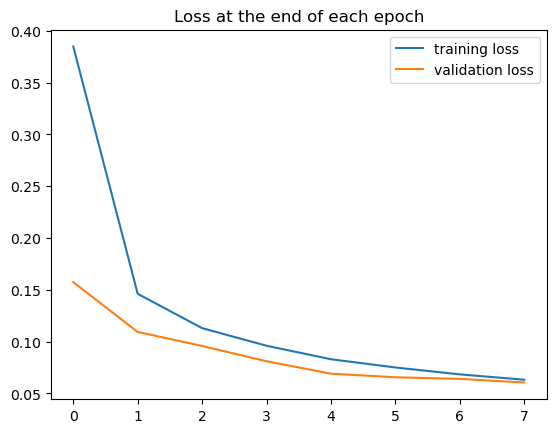

In [114]:
# Plots the loss at the end of each epoch with Matplolib
plt.plot(train_losses, label='training loss')
plt.plot(val_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

Once the loss of the CNN model has been decreased as mush as possible, the training and validation accuracies can be checked in a line graph plot. As the objective of reducing the training and validation loss is to increase the accuracy, the training and validation accuracies should increase.

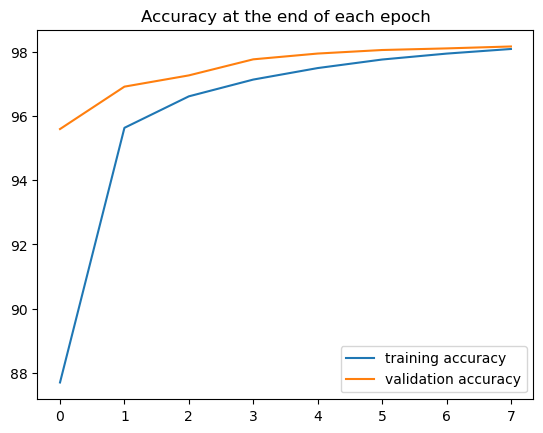

In [115]:
# Plots the accuracy at the end of each epoch with Matplolib
plt.plot(train_accuracy, label='training accuracy')
plt.plot(val_accuracy, label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend();

# Display a Batch of Test Images
In the next cells, a batch of images from the test dataset is loaded to the Jupyter/Colab Notebook. It is important to view the images when training image classification systems to get familiar with the datasets you are working with. Being familiar with datasets can help you troubleshoot problems with more complex deep neural network models.

In [116]:
# Loads the first test batch to the notebook
for images, labels in test_dataset:
    break

# Display the First Batch of Test Images

Labels:  [7 2 1 0 4 1 4 9 5 9 0 6]


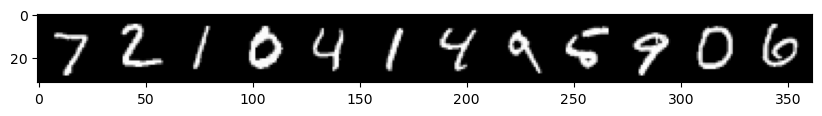

In [117]:
# Print the first 12 labels
print('Labels: ', labels[:12].numpy())

# Print the first 12 images
im = make_grid(images[:12], nrow=12)               # The default nrow is 8
plt.figure(figsize=(10,4))

# We need to transpose the images from CWH to WHC
plt.imshow(np.transpose(im.numpy(), (1,2,0)));

In [118]:
# Number of images, colour channel, width, height
images.shape

torch.Size([20, 1, 28, 28])

In [119]:
# Prints out the shape of the labels tensor to the screen
labels.shape

torch.Size([20])

# 6. Evaluate the Test Dataset

In [120]:
# Python lists to store the prediction made at test time and 
# the actual labels from the MNIST dataset
y_preds = []
labels = []

# Sets the model into evaluaiton mode to make sure backpropagation calcaultions
# that are not requied for test time are not carried out to slow down test time performance
model.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataset, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
    
    # Appends the label of the classification to the labels list
    labels.append(y)
    
# Concatenate list of predictions into a PyTorch tensor
y_pred_tensor = torch.cat(y_preds)
labels=torch.cat(labels).int()

Making predictions:   0%|          | 0/500 [00:00<?, ?it/s]

In [121]:
# Prints out the y_pred tensor to the screen
y_pred_tensor

tensor([7, 2, 1,  ..., 4, 5, 6])

In [122]:
# Prints out the labels tensor to the screen
labels

tensor([7, 2, 1,  ..., 4, 5, 6], dtype=torch.int32)

# 7. Evaluate the Test Dataset with Torchmetrics

PyTorch torchmetrics documentation:

https://torchmetrics.readthedocs.io/en/stable/classification/accuracy.html

https://torchmetrics.readthedocs.io/en/stable/classification/recall.html

https://torchmetrics.readthedocs.io/en/stable/classification/precision.html

https://torchmetrics.readthedocs.io/en/stable/classification/f1_score.html


In [123]:
# See if torchmetrics exists, if not, install it
try:
    # If torchmetrics and mlxtend are installed they are improted to eh notebook
    import torchmetrics, mlxtend
    
    # Pirnts out the version of mlxtend to the screen
    print(f"mlxtend version: {mlxtend.__version__}")
    
    # MAkes sure that mlxtend version 0.19.0 or higher is installed
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    
    # If torchmetrics are not installed pip will insall the PyTorch package
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    
    # Imports torchmetrics for test metrics and mlxtend for our confusion matrix plot
    import torchmetrics, mlxtend
    
    # Pirnts out the version of mlxtend to the screen
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.22.0


In [124]:
# Initilizes the training metrics from torchmetrics
accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=10)
recall = torchmetrics.Recall(task="multiclass", average="macro", num_classes=10)
precision = torchmetrics.Precision(task="multiclass", average="macro", num_classes=10)
f1_score = torchmetrics.F1Score(task="multiclass", num_classes=10)

# Sotres the numer of batches for the for loop to iterate through
n_batches = len(test_dataset)

# For loop to loop thorugh the bathes
for i in range(n_batches):
    
    # Test metrics on current batch for accuray, recall and precison
    acc = accuracy(y_pred_tensor, labels)
    print(f"Accuracy on batch {i+1}: {acc}")
    rec = recall(y_pred_tensor, labels)
    print(f"Recall on batch {i+1}: {rec}")
    pre = precision(y_pred_tensor, labels)
    print(f"Precision on batch {i+1}: {pre}")
    f1 = f1_score(y_pred_tensor, labels)
    print(f"F-1 Score on batch {i+1}: {f1}")
    print("\n")

# Prints out the test accuracy, recall and precisoin for the overall model
print("Overall Accuray, Recall, Precision and F1-Score Metrics for the Model\n")
acc = accuracy.compute()
print(f"Accuracy on all data: {acc}")
rec = recall.compute()
print(f"Recall on all data: {rec}")
pre = precision.compute()
print(f"Precision on all data: {pre}")
f1 = f1_score.compute()
print(f"F-1 Score on all data {i+1}: {f1}")

# Resets the test metrics after use
accuracy.reset()
recall.reset()
precision.reset()
f1_score.reset()

Accuracy on batch 1: 0.9763000011444092
Recall on batch 1: 0.9759714007377625
Precision on batch 1: 0.9764255881309509
F-1 Score on batch 1: 0.9763000011444092


Accuracy on batch 2: 0.9763000011444092
Recall on batch 2: 0.9759714007377625
Precision on batch 2: 0.9764255881309509
F-1 Score on batch 2: 0.9763000011444092


Accuracy on batch 3: 0.9763000011444092
Recall on batch 3: 0.9759714007377625
Precision on batch 3: 0.9764255881309509
F-1 Score on batch 3: 0.9763000011444092


Accuracy on batch 4: 0.9763000011444092
Recall on batch 4: 0.9759714007377625
Precision on batch 4: 0.9764255881309509
F-1 Score on batch 4: 0.9763000011444092


Accuracy on batch 5: 0.9763000011444092
Recall on batch 5: 0.9759714007377625
Precision on batch 5: 0.9764255881309509
F-1 Score on batch 5: 0.9763000011444092


Accuracy on batch 6: 0.9763000011444092
Recall on batch 6: 0.9759714007377625
Precision on batch 6: 0.9764255881309509
F-1 Score on batch 6: 0.9763000011444092


Accuracy on batch 7: 0.97630

Recall on batch 70: 0.9759714007377625
Precision on batch 70: 0.9764255881309509
F-1 Score on batch 70: 0.9763000011444092


Accuracy on batch 71: 0.9763000011444092
Recall on batch 71: 0.9759714007377625
Precision on batch 71: 0.9764255881309509
F-1 Score on batch 71: 0.9763000011444092


Accuracy on batch 72: 0.9763000011444092
Recall on batch 72: 0.9759714007377625
Precision on batch 72: 0.9764255881309509
F-1 Score on batch 72: 0.9763000011444092


Accuracy on batch 73: 0.9763000011444092
Recall on batch 73: 0.9759714007377625
Precision on batch 73: 0.9764255881309509
F-1 Score on batch 73: 0.9763000011444092


Accuracy on batch 74: 0.9763000011444092
Recall on batch 74: 0.9759714007377625
Precision on batch 74: 0.9764255881309509
F-1 Score on batch 74: 0.9763000011444092


Accuracy on batch 75: 0.9763000011444092
Recall on batch 75: 0.9759714007377625
Precision on batch 75: 0.9764255881309509
F-1 Score on batch 75: 0.9763000011444092


Accuracy on batch 76: 0.9763000011444092
Reca

F-1 Score on batch 130: 0.9763000011444092


Accuracy on batch 131: 0.9763000011444092
Recall on batch 131: 0.9759714007377625
Precision on batch 131: 0.9764255881309509
F-1 Score on batch 131: 0.9763000011444092


Accuracy on batch 132: 0.9763000011444092
Recall on batch 132: 0.9759714007377625
Precision on batch 132: 0.9764255881309509
F-1 Score on batch 132: 0.9763000011444092


Accuracy on batch 133: 0.9763000011444092
Recall on batch 133: 0.9759714007377625
Precision on batch 133: 0.9764255881309509
F-1 Score on batch 133: 0.9763000011444092


Accuracy on batch 134: 0.9763000011444092
Recall on batch 134: 0.9759714007377625
Precision on batch 134: 0.9764255881309509
F-1 Score on batch 134: 0.9763000011444092


Accuracy on batch 135: 0.9763000011444092
Recall on batch 135: 0.9759714007377625
Precision on batch 135: 0.9764255881309509
F-1 Score on batch 135: 0.9763000011444092


Accuracy on batch 136: 0.9763000011444092
Recall on batch 136: 0.9759714007377625
Precision on batch 136:

Accuracy on batch 202: 0.9763000011444092
Recall on batch 202: 0.9759714007377625
Precision on batch 202: 0.9764255881309509
F-1 Score on batch 202: 0.9763000011444092


Accuracy on batch 203: 0.9763000011444092
Recall on batch 203: 0.9759714007377625
Precision on batch 203: 0.9764255881309509
F-1 Score on batch 203: 0.9763000011444092


Accuracy on batch 204: 0.9763000011444092
Recall on batch 204: 0.9759714007377625
Precision on batch 204: 0.9764255881309509
F-1 Score on batch 204: 0.9763000011444092


Accuracy on batch 205: 0.9763000011444092
Recall on batch 205: 0.9759714007377625
Precision on batch 205: 0.9764255881309509
F-1 Score on batch 205: 0.9763000011444092


Accuracy on batch 206: 0.9763000011444092
Recall on batch 206: 0.9759714007377625
Precision on batch 206: 0.9764255881309509
F-1 Score on batch 206: 0.9763000011444092


Accuracy on batch 207: 0.9763000011444092
Recall on batch 207: 0.9759714007377625
Precision on batch 207: 0.9764255881309509
F-1 Score on batch 207: 0

Recall on batch 269: 0.9759714007377625
Precision on batch 269: 0.9764255881309509
F-1 Score on batch 269: 0.9763000011444092


Accuracy on batch 270: 0.9763000011444092
Recall on batch 270: 0.9759714007377625
Precision on batch 270: 0.9764255881309509
F-1 Score on batch 270: 0.9763000011444092


Accuracy on batch 271: 0.9763000011444092
Recall on batch 271: 0.9759714007377625
Precision on batch 271: 0.9764255881309509
F-1 Score on batch 271: 0.9763000011444092


Accuracy on batch 272: 0.9763000011444092
Recall on batch 272: 0.9759714007377625
Precision on batch 272: 0.9764255881309509
F-1 Score on batch 272: 0.9763000011444092


Accuracy on batch 273: 0.9763000011444092
Recall on batch 273: 0.9759714007377625
Precision on batch 273: 0.9764255881309509
F-1 Score on batch 273: 0.9763000011444092


Accuracy on batch 274: 0.9763000011444092
Recall on batch 274: 0.9759714007377625
Precision on batch 274: 0.9764255881309509
F-1 Score on batch 274: 0.9763000011444092


Accuracy on batch 275:

F-1 Score on batch 332: 0.9763000011444092


Accuracy on batch 333: 0.9763000011444092
Recall on batch 333: 0.9759714007377625
Precision on batch 333: 0.9764255881309509
F-1 Score on batch 333: 0.9763000011444092


Accuracy on batch 334: 0.9763000011444092
Recall on batch 334: 0.9759714007377625
Precision on batch 334: 0.9764255881309509
F-1 Score on batch 334: 0.9763000011444092


Accuracy on batch 335: 0.9763000011444092
Recall on batch 335: 0.9759714007377625
Precision on batch 335: 0.9764255881309509
F-1 Score on batch 335: 0.9763000011444092


Accuracy on batch 336: 0.9763000011444092
Recall on batch 336: 0.9759714007377625
Precision on batch 336: 0.9764255881309509
F-1 Score on batch 336: 0.9763000011444092


Accuracy on batch 337: 0.9763000011444092
Recall on batch 337: 0.9759714007377625
Precision on batch 337: 0.9764255881309509
F-1 Score on batch 337: 0.9763000011444092


Accuracy on batch 338: 0.9763000011444092
Recall on batch 338: 0.9759714007377625
Precision on batch 338:

Recall on batch 385: 0.9759714007377625
Precision on batch 385: 0.9764255881309509
F-1 Score on batch 385: 0.9763000011444092


Accuracy on batch 386: 0.9763000011444092
Recall on batch 386: 0.9759714007377625
Precision on batch 386: 0.9764255881309509
F-1 Score on batch 386: 0.9763000011444092


Accuracy on batch 387: 0.9763000011444092
Recall on batch 387: 0.9759714007377625
Precision on batch 387: 0.9764255881309509
F-1 Score on batch 387: 0.9763000011444092


Accuracy on batch 388: 0.9763000011444092
Recall on batch 388: 0.9759714007377625
Precision on batch 388: 0.9764255881309509
F-1 Score on batch 388: 0.9763000011444092


Accuracy on batch 389: 0.9763000011444092
Recall on batch 389: 0.9759714007377625
Precision on batch 389: 0.9764255881309509
F-1 Score on batch 389: 0.9763000011444092


Accuracy on batch 390: 0.9763000011444092
Recall on batch 390: 0.9759714007377625
Precision on batch 390: 0.9764255881309509
F-1 Score on batch 390: 0.9763000011444092


Accuracy on batch 391:

Accuracy on batch 450: 0.9763000011444092
Recall on batch 450: 0.9759714007377625
Precision on batch 450: 0.9764255881309509
F-1 Score on batch 450: 0.9763000011444092


Accuracy on batch 451: 0.9763000011444092
Recall on batch 451: 0.9759714007377625
Precision on batch 451: 0.9764255881309509
F-1 Score on batch 451: 0.9763000011444092


Accuracy on batch 452: 0.9763000011444092
Recall on batch 452: 0.9759714007377625
Precision on batch 452: 0.9764255881309509
F-1 Score on batch 452: 0.9763000011444092


Accuracy on batch 453: 0.9763000011444092
Recall on batch 453: 0.9759714007377625
Precision on batch 453: 0.9764255881309509
F-1 Score on batch 453: 0.9763000011444092


Accuracy on batch 454: 0.9763000011444092
Recall on batch 454: 0.9759714007377625
Precision on batch 454: 0.9764255881309509
F-1 Score on batch 454: 0.9763000011444092


Accuracy on batch 455: 0.9763000011444092
Recall on batch 455: 0.9759714007377625
Precision on batch 455: 0.9764255881309509
F-1 Score on batch 455: 0

# Test Performance Metrics

At test time, the accuracy, precision, recall, and F1-Score can be used to determine how the CNN model reacts to unseen data the network has not seen during training or validation. The accuracy, recall, precision, and f1-score should be as high as possible for a classification system. Please scroll down to the last set of test performance metrics to view them for the overall CNN model.

# Confusion Matrix Plot

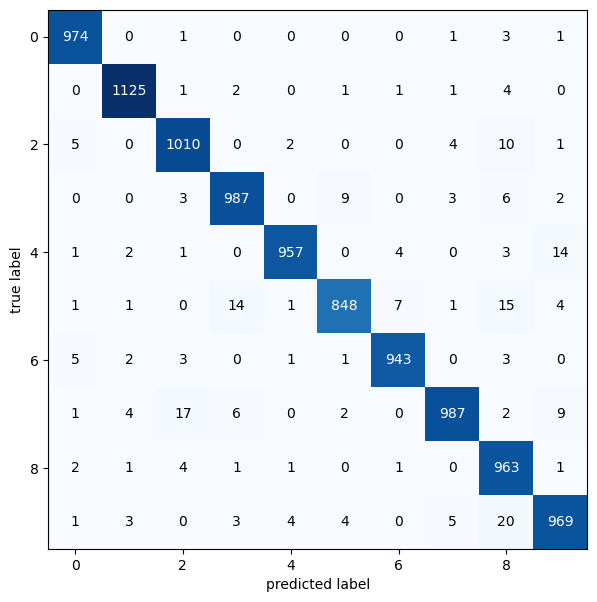

In [125]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=10, task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=labels)

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    figsize=(10, 7)
);

The confusion matrix plot can be used to analyze where the CNN model is predicting images from the dataset. On the X-axis is the predicted label by the CNN model, and the y-axis is the true label from the MNIST dataset. In the dark blue squares is where the CNN model has predicted the image to the correct class according to the x and y-axes of the confusion matrix plot.

The mlxtend user guide for confusion matrix plots has more straightforward examples and detailed descriptions. Mlxtend Confusion Matrix user link:

https://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/

# 8. Save and Reload the Trained Model

PyTorch Documentaiton:

https://pytorch.org/tutorials/beginner/saving_loading_models.html


# Coding Challenge 3

In the torch.save method, add your file path link to your output folder or create an output folder with the same name as in the link provided to save your model weights file to. The model weights file is from your trained CNN model. If you close the notebook before you save your model weights folder, the run time will be deleted, and you will have to retrain your CNN model to obtain another trained model to output to a weights file.

In [126]:
# Saves the trained model to the ModelANN/Model file directory
torch.save(model, './CNNmodels/CNN-8-001')

In [127]:
# Print out the variables used in the model and evaluation to the screen
%whos

Variable                  Type                          Data/Info
-----------------------------------------------------------------
Adam                      type                          <class 'torch.optim.adam.Adam'>
CNN                       type                          <class '__main__.CNN'>
ConfusionMatrix           type                          <class 'torchmetrics.clas<...>_matrix.ConfusionMatrix'>
DataLoader                type                          <class 'torch.utils.data.dataloader.DataLoader'>
F                         module                        <module 'torch.nn.functio<...>/torch/nn/functional.py'>
SubsetRandomSampler       type                          <class 'torch.utils.data.<...>ler.SubsetRandomSampler'>
Variable                  VariableMeta                  <class 'torch.autograd.variable.Variable'>
X                         Tensor                        tensor([[[[0., 0., 0.,  .<...>0.,  ..., 0., 0., 0.]]]])
acc                       Tensor                 